In [12]:
#Importing important librabies
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt


import matplotlib as mtl 
%matplotlib inline
!pip install sweetviz

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
air_quality = pd.read_excel("CO2 dataset.xlsx")   #importing the dataset

In [15]:
air_quality.head()  

Year      CO2
0  1800  0.00568
1  1801  0.00561
2  1802  0.00555
3  1803  0.00548
4  1804  0.00542

The dataset has one variable dependent w.r.t. time hence we call the dataset as 'Univariant dataset'.

## EDA (Exploratory Data Analysis)

In [16]:
#Checking for Non-null values, datatypes of variables
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.4 KB


In [17]:
#Count of duplicated rows
air_quality[air_quality.duplicated()].shape

(0, 2)

In [18]:
#Data Structure 
air_quality.shape

(215, 2)

In [19]:
#data types
air_quality.dtypes

Year      int64
CO2     float64
dtype: object

In [20]:
#Parsing Year column as dates (for time series analysis time should be always in date_time dtype)
# then using it as index column fr further analysis

air_quality = pd.read_excel("CO2 dataset.xlsx",parse_dates=['Year'],index_col='Year')
air_quality

CO2
Year                
1800-01-01   0.00568
1801-01-01   0.00561
1802-01-01   0.00555
1803-01-01   0.00548
1804-01-01   0.00542
...              ...
2010-01-01  15.60000
2011-01-01  15.60000
2012-01-01  14.80000
2013-01-01  14.70000
2014-01-01  15.10000

[215 rows x 1 columns]

In [21]:
# we can do convinient slicing for a specific time period

air_quality['1850-01-01':'1950-01-01']

CO2
Year               
1850-01-01   0.0236
1851-01-01   0.0271
1852-01-01   0.0318
1853-01-01   0.0376
1854-01-01   0.0445
...             ...
1946-01-01  11.0000
1947-01-01  11.2000
1948-01-01  12.1000
1949-01-01  10.8000
1950-01-01  11.2000

[101 rows x 1 columns]

In [22]:
# we can check values corresponding to a specific time point
air_quality.loc['2008']

CO2
Year            
2008-01-01  16.8

In [23]:
#Descriptive stat

air_quality['CO2'].describe()

count    215.000000
mean       6.741970
std        6.522437
min        0.001750
25%        0.041050
50%        6.390000
75%       11.500000
max       18.200000
Name: CO2, dtype: float64

                                             |          | [  0%]   00:00 -> (? left)


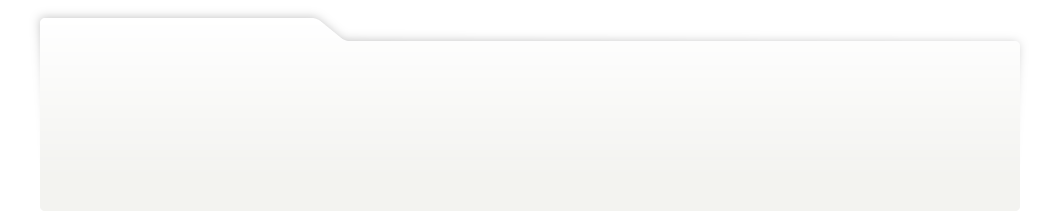
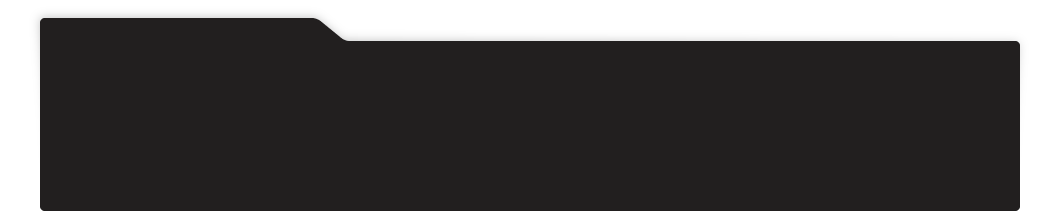
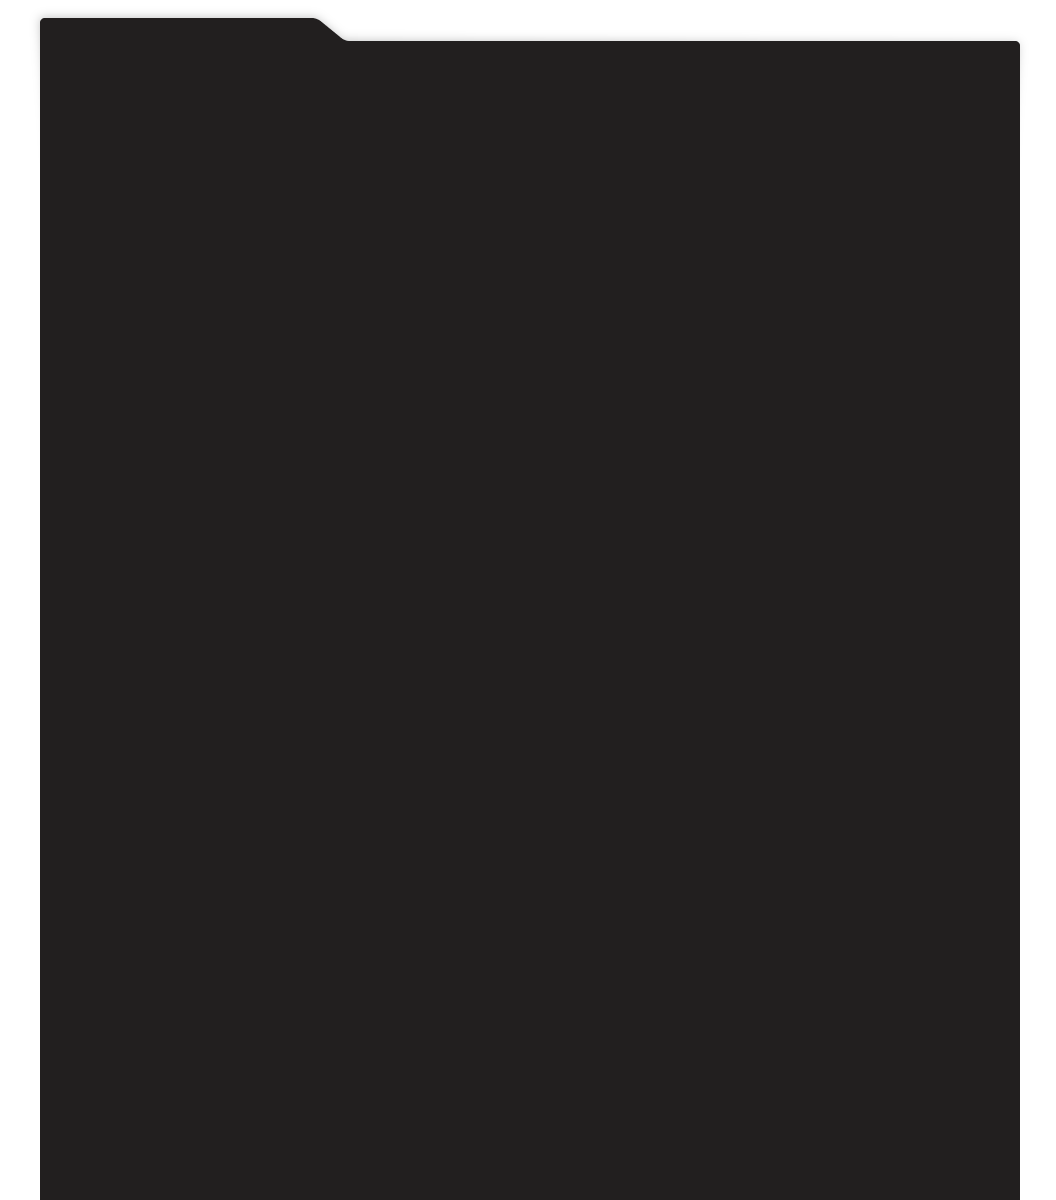
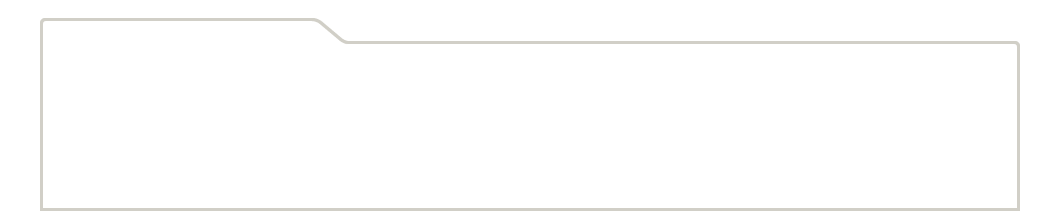
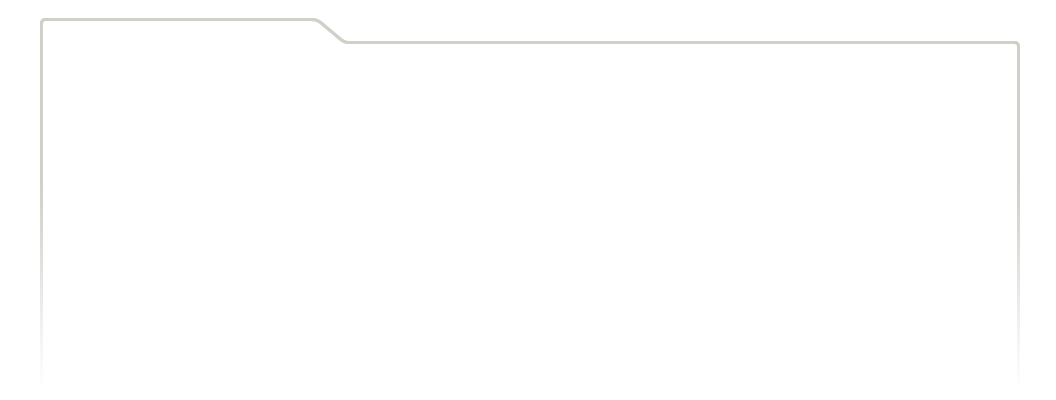
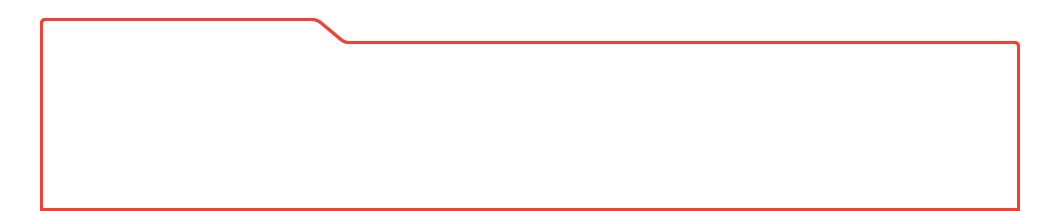
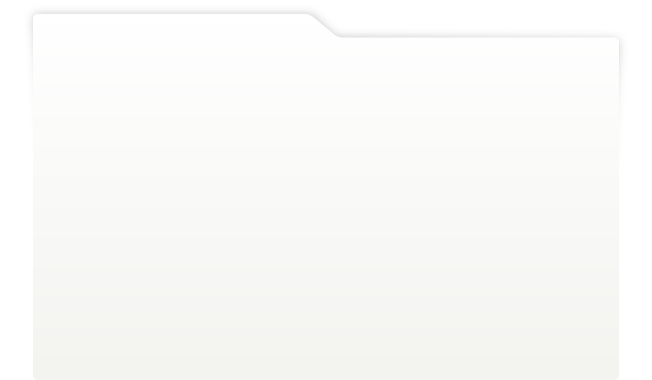
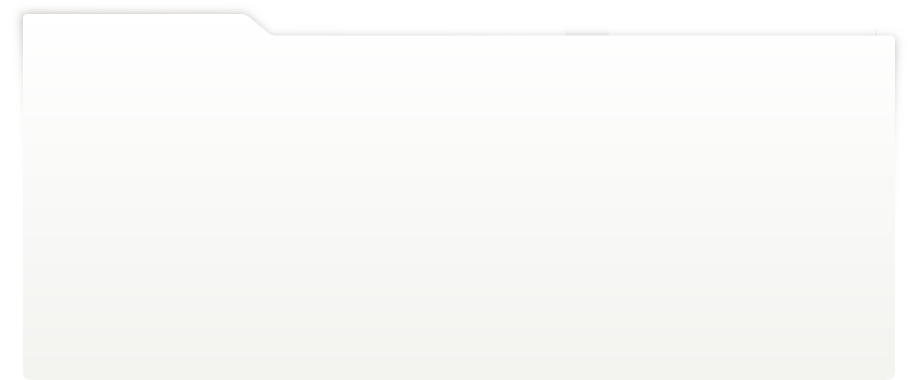
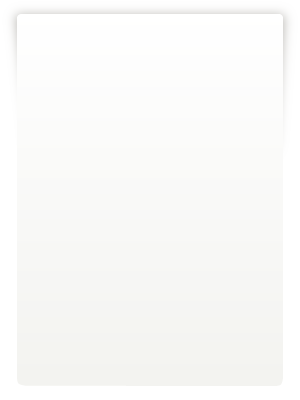
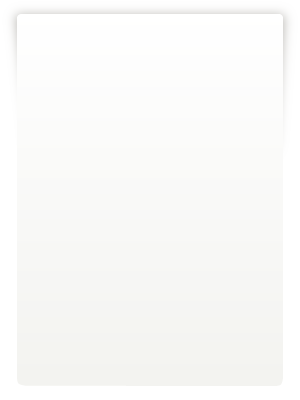
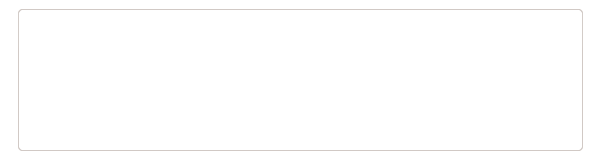
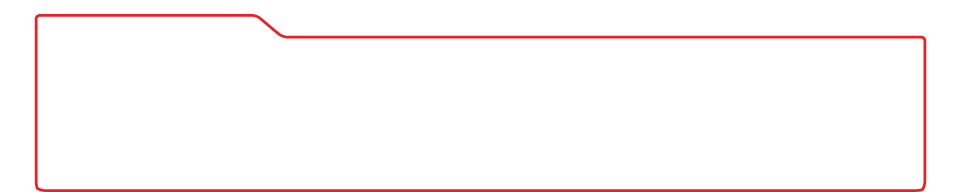
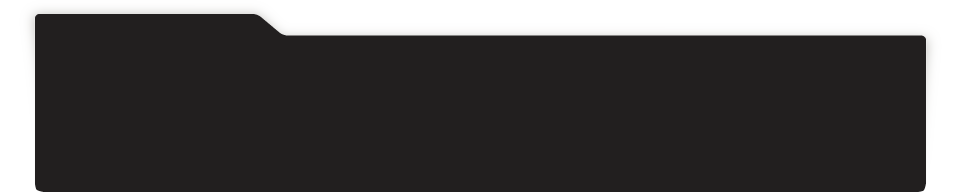
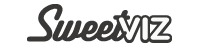
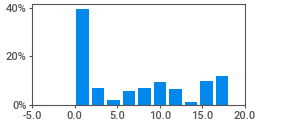
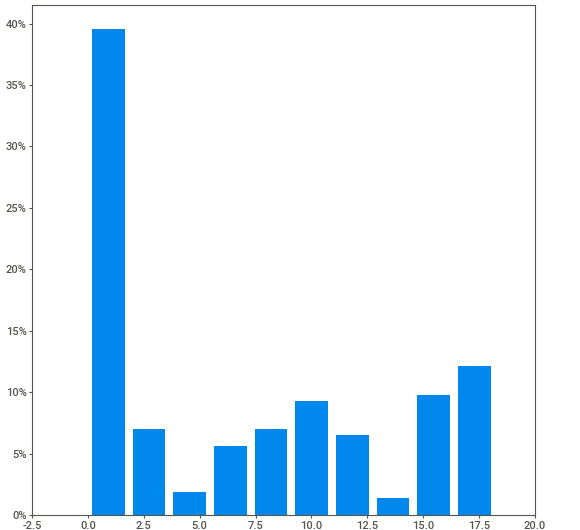
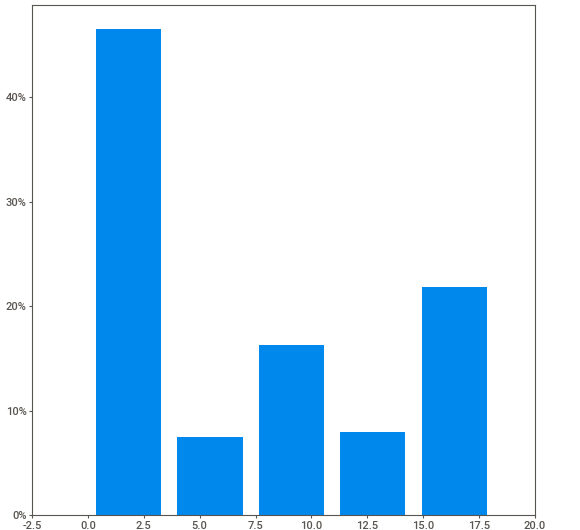
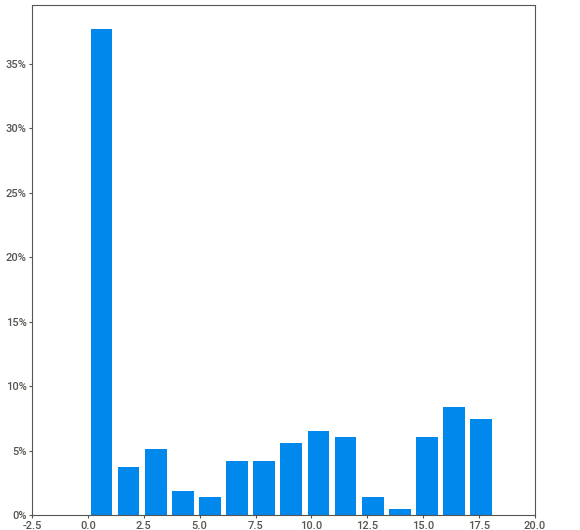
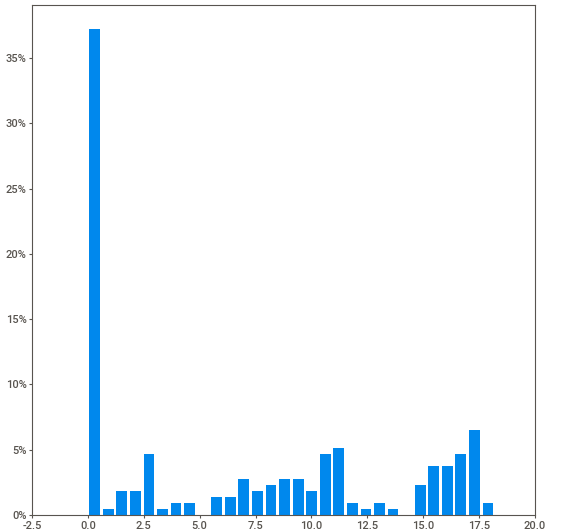
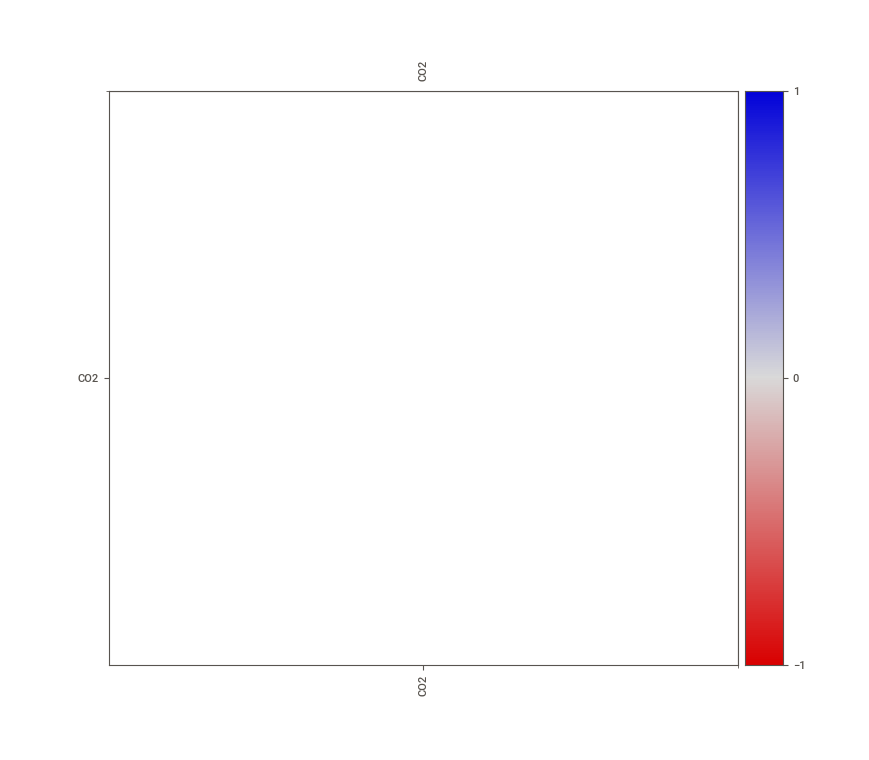
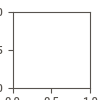

In [24]:
sweet_report = sv.analyze(air_quality)
sweet_report.show_notebook(layout='widescreen' , w=880, h=700, scale=0.8)

## Outlier detection

<AxesSubplot:>

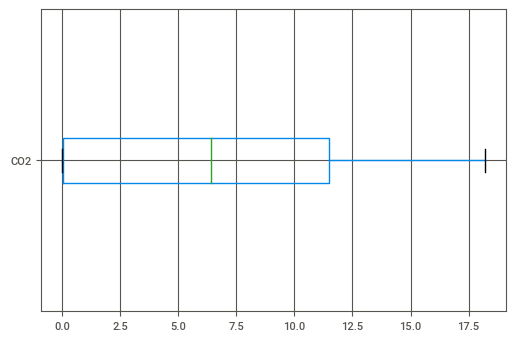

In [25]:
#Box plot
air_quality.boxplot(column=['CO2'],vert=False)

No Outlier has been detected

## Visualization 

In [26]:
! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [27]:
air = pd.read_excel("CO2 dataset.xlsx")   #importing the dataset

In [28]:
#plotting a line plot using plotly

fig = px.line(air, x=air.Year, y=[air['CO2']],
             labels={'Year': 'Year','value':'CO2 Emmision'})
fig.update_layout(title_text='CO2 emmision chart', font_size=15, font_color='black',legend_title_text='CO2 Parameters')
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()


## Inference

### Here we can see sudden increase in CO2 emission between 1840-1860 and 1950-1990
### Lets split the data and have a close look at these time periods

In [29]:
#Splitting the data

df1 = air_quality['1840':'1860']
df2 = air_quality['1950':'1990']

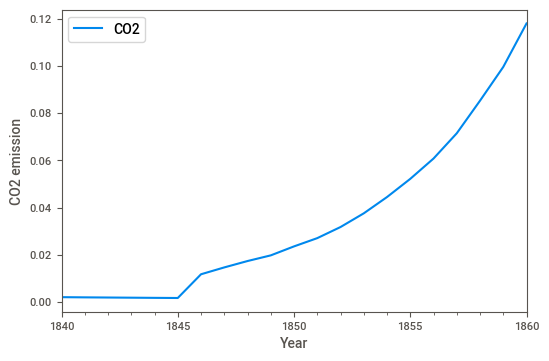

In [30]:
# Checking for time period of 1840-1860

ax1 = df1.plot()
ax1.set_ylabel('CO2 emission');

### Inference :
As here we see there is sudden rise in CO2 emission after 1845 that is because of the starting of Industrialization which was led by United Kingdom at that time period, with USA as second highest emitters in the world. 

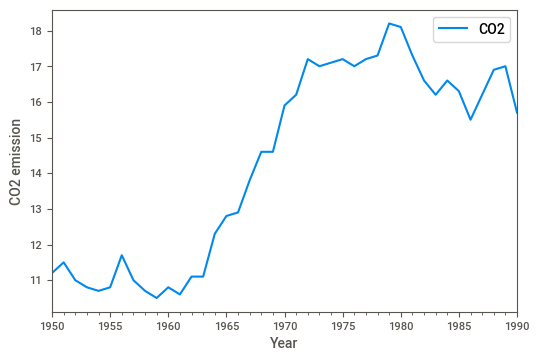

In [31]:
# Checking for time period of 1950':'1990

ax2 = df2.plot()
ax2.set_ylabel('CO2 emission');

### Inference :
Here we can see immense growth in CO2 emission after 1960. 
As the reason we found that there were some new developments after 1960. Along with America & Europe, Asian countries also started Industrializaing which caused this increased  emission.

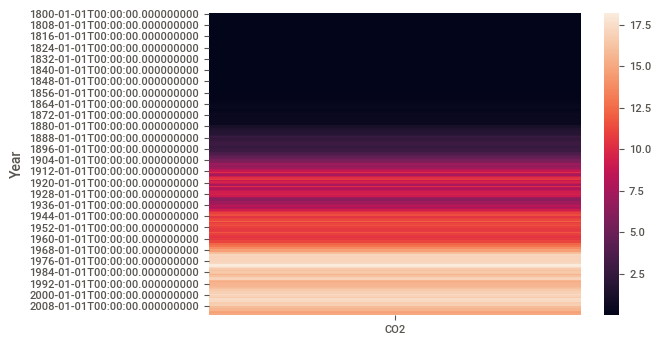

In [32]:
#plotting Heatmap  

ax = sns.heatmap(air_quality)

### Simple Moving Average

In [33]:
#rolling average transform

rollingseries = air_quality.rolling(window = 10)

rollingmean = rollingseries.mean()    #finding rolling mean MA(5)


In [34]:
air_quality.head(20)

CO2
Year               
1800-01-01  0.00568
1801-01-01  0.00561
1802-01-01  0.00555
1803-01-01  0.00548
1804-01-01  0.00542
1805-01-01  0.00536
1806-01-01  0.00529
1807-01-01  0.00523
1808-01-01  0.00517
1809-01-01  0.00511
1810-01-01  0.00504
1811-01-01  0.00497
1812-01-01  0.00490
1813-01-01  0.00483
1814-01-01  0.00475
1815-01-01  0.00466
1816-01-01  0.00457
1817-01-01  0.00447
1818-01-01  0.00438
1819-01-01  0.00427

In [35]:
rollingmean.head(20)

CO2
Year                
1800-01-01       NaN
1801-01-01       NaN
1802-01-01       NaN
1803-01-01       NaN
1804-01-01       NaN
1805-01-01       NaN
1806-01-01       NaN
1807-01-01       NaN
1808-01-01       NaN
1809-01-01  0.005390
1810-01-01  0.005326
1811-01-01  0.005262
1812-01-01  0.005197
1813-01-01  0.005132
1814-01-01  0.005065
1815-01-01  0.004995
1816-01-01  0.004923
1817-01-01  0.004847
1818-01-01  0.004768
1819-01-01  0.004684

Graph with Moving Averages


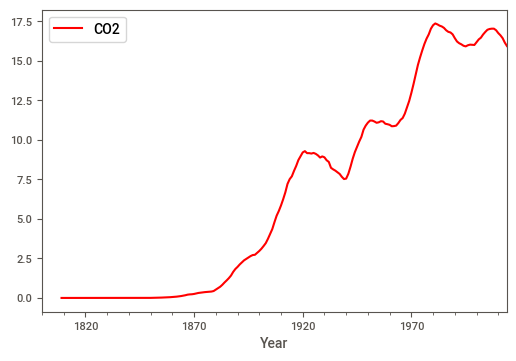

In [36]:
# plot transformed data
print("Graph with Moving Averages")
rollingmean.plot(color = 'red')
plt.show()


Graph with Original Values


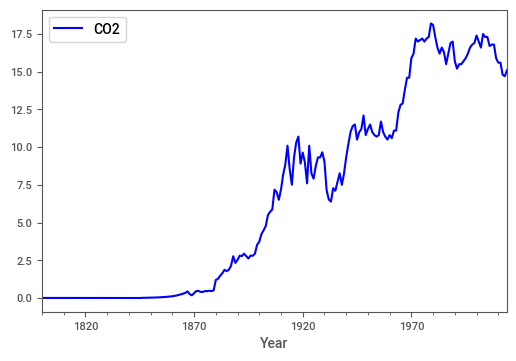

In [37]:
print("Graph with Original Values")
air_quality.plot(color = 'blue')
plt.show()

### Simple Exponential Smoothing

In [38]:
# exponential smoothing - single

fit1 = SimpleExpSmoothing(air_quality).fit(smoothing_level=0.2,optimized=False)

fit2 = SimpleExpSmoothing(air_quality).fit(smoothing_level=0.1,optimized=False)


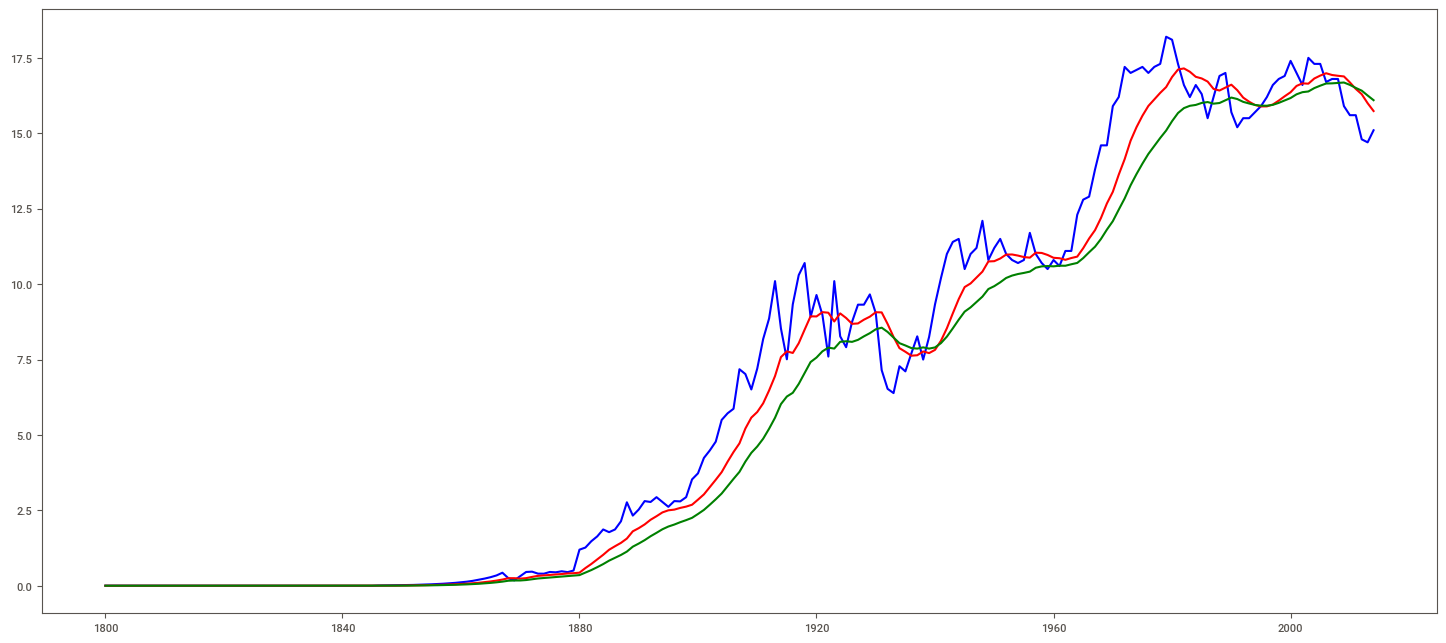

In [39]:
plt.figure(figsize=(18,8))
plt.plot(air_quality,  color = 'blue')         #a blue line will show original datapoints

plt.plot(fit1.fittedvalues, color = 'red')     #a red line will show smothened values with smoothing level of 0.2

plt.plot(fit2.fittedvalues, color = 'green')   #a green line will show smothened values with smoothing level of 0.10

### Holt's Method of Exponential Smoothing

In [40]:
fit1 = Holt(air_quality).fit()    #Assuming linear trend

fit2 = Holt(air_quality, exponential=True).fit()    #Assuming exponential trend

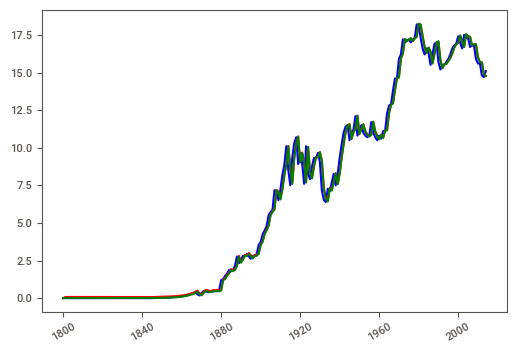

In [41]:
plt.plot(air_quality, color = 'blue')
plt.xticks(rotation=30)
 
plt.plot(fit1.fittedvalues, color = 'red')

plt.plot(fit2.fittedvalues, color = 'green')

### Comparison of Exponential and Holt's Methods of Forecasting

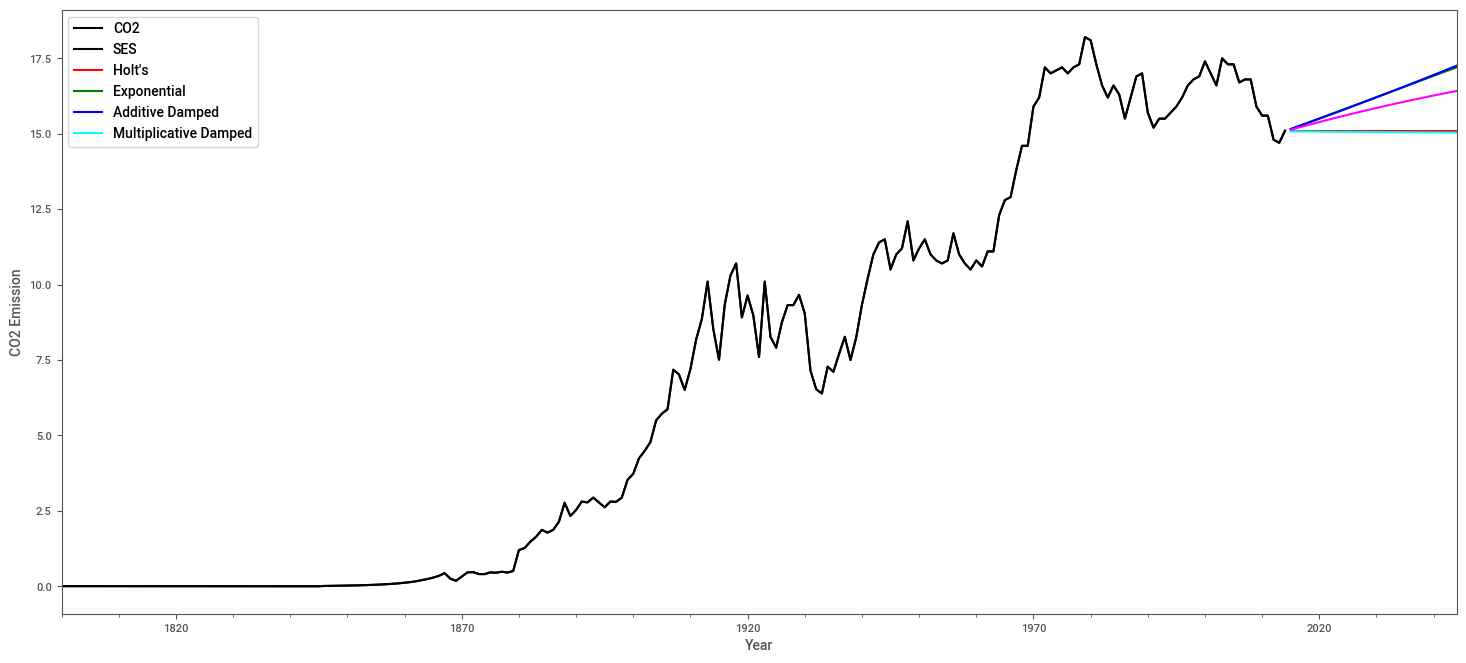

In [42]:
fit1 = SimpleExpSmoothing(air_quality, initialization_method="estimated").fit()
fcast1 = fit1.forecast(30).rename("SES")

fit2 = Holt(air_quality, initialization_method="estimated").fit()
fcast2 = fit2.forecast(30).rename("Holt's")

fit3 = Holt(air_quality, exponential=True, initialization_method="estimated").fit()
fcast3 = fit3.forecast(30).rename("Exponential")

fit4 = Holt(air_quality, damped_trend=True, initialization_method="estimated").fit(damping_trend=0.98)
fcast4 = fit4.forecast(30).rename("Additive Damped")

fit5 = Holt(air_quality, exponential=True, damped_trend=True, initialization_method="estimated").fit()
fcast5 = fit5.forecast(30).rename("Multiplicative Damped")

ax = air_quality.plot(color="black", figsize=(18, 8))
air_quality.plot(ax=ax, color="black", legend=False)
fcast1.plot(ax=ax, color="red", legend=True)
fcast2.plot(ax=ax, color="green", legend=True)
fcast3.plot(ax=ax, color="blue", legend=True)
fcast4.plot(ax=ax, color="cyan", legend=True)
fcast5.plot(ax=ax, color="magenta", legend=True)
ax.set_ylabel("CO2 Emission")
plt.show()


In [43]:
a = fcast1.mean()
b = fcast2.mean()
c = fcast3.mean()
d = fcast4.mean()
e = fcast5.mean()

In [44]:
data = {"Smoothing Methods":pd.Series(["Simple Exponential","Holt's","Holt's Exponential","Holt's Additive Damped","Holt's Multiplicative Damped"]),"Average Emission(for next 30 yr)":pd.Series([a,b,c,d,e])}
table_smooth=pd.DataFrame(data)
table_smooth

Smoothing Methods  Average Emission(for next 30 yr)
0            Simple Exponential                         15.090509
1                        Holt's                         16.177854
2            Holt's Exponential                         16.183117
3        Holt's Additive Damped                         15.055998
4  Holt's Multiplicative Damped                         15.811961

### Seasoal decomposition and ADF Test

In [45]:
#import seasonal decomposition package library from statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [46]:
test_result = adfuller(air_quality['CO2'])

In [47]:
# check for stationarity of data using dicky fuller test

# Ho : It is non-stationary (Null hypothesis)
# H1 : It is stationary  (Alternative hypothesis)

def adfuller_test(emission):
    result = adfuller(emission)
    labels =  ['ADF test statistic', 'p value', '#Lags used','No. of observations used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <= 0.05 :
        print('Strong evidence against null hypothesis, data is stationary')
    else:
        print('Weak evidence against null hypothesis, data is non-stationary')
        

In [48]:
adfuller_test(air_quality.CO2)

ADF test statistic:-0.37846277515588783
p value:0.9136330950336236
#Lags used:0
No. of observations used:214
Weak evidence against null hypothesis, data is non-stationary


#### So here we can see the data is non-stationary, we have to make it stationary

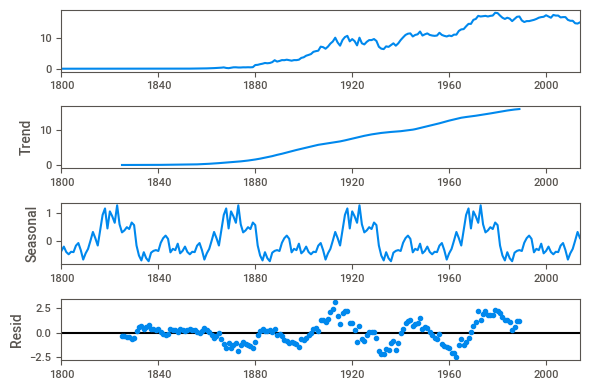

In [49]:
df_mul_decompose = seasonal_decompose(air_quality, period=50 )
df_mul_decompose.plot()
plt.show()

### Rolling Statistics Test

                  CO2
Year                 
1800-01-01        NaN
1801-01-01        NaN
1802-01-01        NaN
1803-01-01        NaN
1804-01-01        NaN
...               ...
2010-01-01  16.816667
2011-01-01  16.708333
2012-01-01  16.491667
2013-01-01  16.300000
2014-01-01  16.175000

[215 rows x 1 columns]                  CO2
Year                
1800-01-01       NaN
1801-01-01       NaN
1802-01-01       NaN
1803-01-01       NaN
1804-01-01       NaN
...              ...
2010-01-01  0.579707
2011-01-01  0.676163
2012-01-01  0.832803
2013-01-01  0.960114
2014-01-01  1.013657

[215 rows x 1 columns]


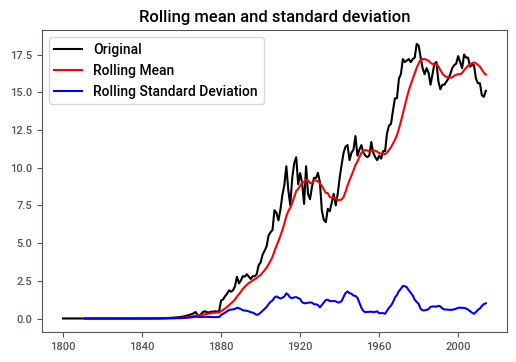

In [50]:
rmean=air_quality.rolling(window=12).mean()
rstd=air_quality.rolling(window=12).std()
print(rmean,rstd)
orig=plt.plot(air_quality , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

### Autocorrelation using ACF and PACF

In [51]:
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams
from cycler import cycler

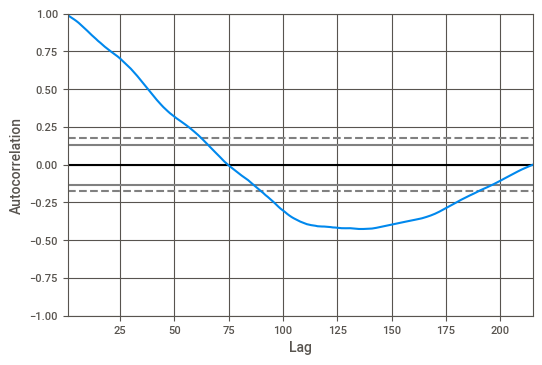

In [52]:
autocorrelation_plot(air_quality)
plt.show()

#### ACF

In [53]:
# Calculate autocorrelation
acf_values = acf(air_quality['CO2'])

In [54]:
# ACF values
np.round(acf_values,2)

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.91, 0.9 , 0.89,
       0.87, 0.86, 0.85, 0.83, 0.82, 0.81, 0.79, 0.78, 0.77, 0.76, 0.75,
       0.74, 0.73, 0.72, 0.7 , 0.69, 0.68, 0.66, 0.65, 0.64, 0.62, 0.6 ,
       0.59, 0.57, 0.55, 0.53, 0.52, 0.5 , 0.48, 0.46])

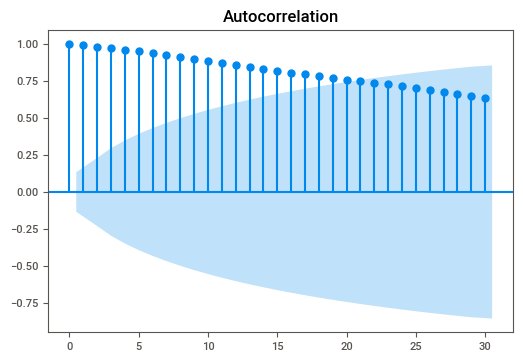

In [55]:
# Plot autocorrelation
plot_acf(air_quality['CO2'], lags=30);

We can see here ACF shows strong positive statistical significance correlation at upto 30 lags that doesn't decay to zero this suggests that the series is non-stationary.

#### PACF

In [56]:
# Calculate partial autocorrelation
pacf_values = pacf(air_quality['CO2'])

In [57]:
# PACF values
np.round(pacf_values,2)

array([ 1.  ,  0.99,  0.04,  0.05, -0.14, -0.02, -0.13, -0.14, -0.12,
        0.04, -0.01, -0.03,  0.  ,  0.17,  0.01, -0.07,  0.18, -0.09,
       -0.02,  0.04,  0.02,  0.03, -0.03, -0.  , -0.03, -0.23, -0.32,
       -0.08,  0.04, -0.02, -0.11, -0.04,  0.06, -0.02, -0.18,  0.02,
        0.01,  0.06, -0.05,  0.11,  0.08])

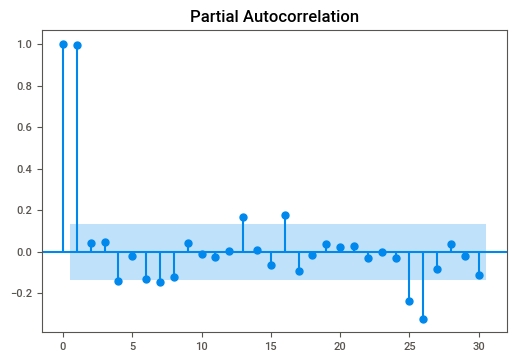

In [58]:
# Plot partial autocorrelation
plot_pacf(air_quality['CO2'], lags=30);

We can see 3-4 lags are exceeding the positive as well as negative threshold area while remaining lags are bounce around between being positive and negative inside the threshold

In [59]:
air_quality.agg(['skew', 'kurtosis']).transpose()

skew  kurtosis
CO2  0.362736 -1.417272

In [60]:
# air_quality.hist(grid=False,
#        figsize=(8, 4),
#        bins=30)

### Transformations

In [61]:
import numpy as np
import pylab
import scipy.stats as stat

#### Normal/Gaussian Transformation

In [62]:
def plot_data(air_quality,feature):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    air_quality[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(air_quality[feature],dist='norm',plot=pylab)
    plt.show()
   

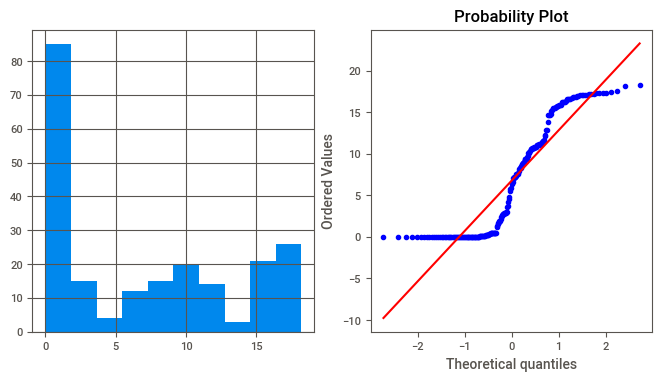

In [63]:
plot_data(air_quality,'CO2')

In [64]:
anorm = air_quality['CO2'].mean()

#### Square Root Transformation

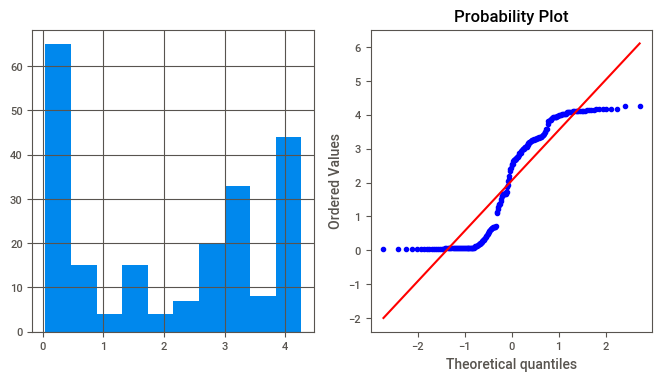

In [65]:
air_quality['CO2_square']=air_quality.CO2**(1/2)
plot_data(air_quality,'CO2_square')

In [66]:
asquare = air_quality['CO2_square'].mean()

#### Log Transformation

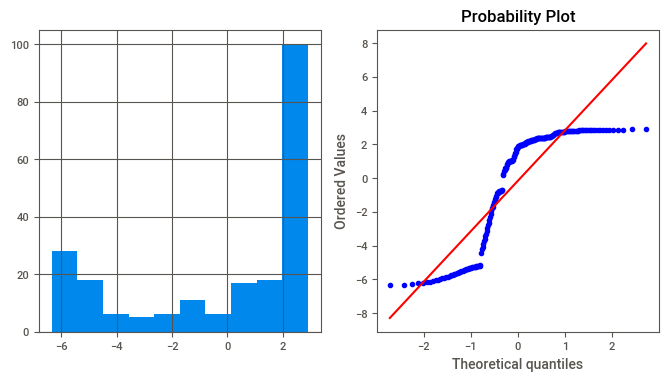

In [67]:
air_quality['CO2_log']=np.log(air_quality['CO2'])
plot_data(air_quality,'CO2_log')


In [68]:
alog = air_quality['CO2_log'].mean()

#### Exponential Transformation

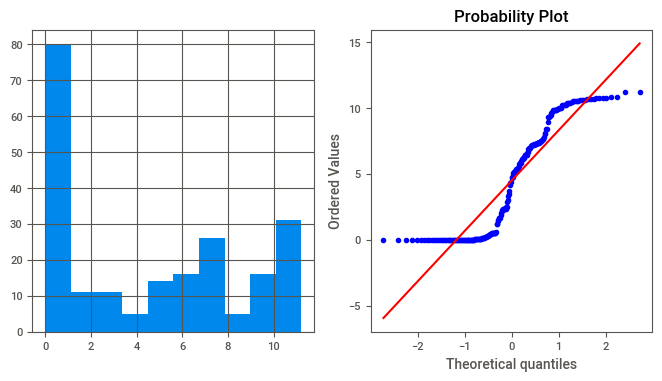

In [69]:
air_quality['CO2_exponential']=air_quality.CO2**(1/1.2)
plot_data(air_quality,'CO2_exponential')


In [70]:
aexp = air_quality['CO2_exponential'].mean()

### Box Cox Transformation

In [71]:
air_quality['CO2_boxcox'],parameters=stat.boxcox(air_quality['CO2'])

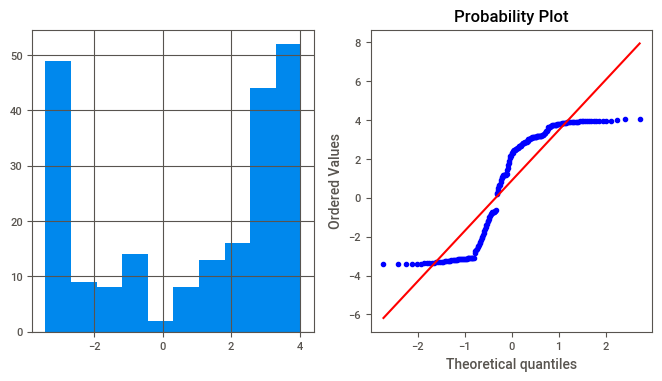

In [72]:
plot_data(air_quality,'CO2_boxcox')

In [73]:
abox = air_quality['CO2_boxcox'].mean()

In [74]:
data = {"Transformation":pd.Series(["Normal/Gaussian","Square Root","Logarithmic","Exponential","Box-Cox"]),"Average Transformed Value of CO2":pd.Series([anorm,asquare,alog,aexp,abox])}
table_transform=pd.DataFrame(data)
table_transform

Transformation  Average Transformed Value of CO2
0  Normal/Gaussian                          6.741970
1      Square Root                          2.055194
2      Logarithmic                         -0.155842
3      Exponential                          4.478513
4          Box-Cox                          0.876720

# Model Building

### Splitting Data

In [75]:
air_quality = pd.read_excel("CO2 dataset.xlsx")   #importing the dataset

In [76]:
air_quality['CO2_square']=air_quality.CO2**(1/12)
air_quality


Year       CO2  CO2_square
0    1800   0.00568    0.649924
1    1801   0.00561    0.649252
2    1802   0.00555    0.648671
3    1803   0.00548    0.647985
4    1804   0.00542    0.647391
..    ...       ...         ...
210  2010  15.60000    1.257266
211  2011  15.60000    1.257266
212  2012  14.80000    1.251762
213  2013  14.70000    1.251055
214  2014  15.10000    1.253857

[215 rows x 3 columns]

In [77]:
Train = air_quality.head(150)
Test =  air_quality.tail(65)

### Evaluation Metric MAPE

In [78]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [79]:
ses_model = SimpleExpSmoothing(Train.CO2).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.CO2) 


26.31793012730597

### Holt method 

In [80]:
# Holt method 
hw_model = Holt(Train["CO2"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.CO2) 

12.188409174745365

### Holts winter exponential smoothing with additive seasonality and additive trend

In [81]:
hwe_model_add_add = ExponentialSmoothing(Train["CO2"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.CO2) 

12.269389535371698

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [82]:
hwe_model_mul_add = ExponentialSmoothing(Train["CO2"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.CO2)

24.055164795527055

## MODEL BUILDING

In [83]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('CO2~Year',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['Year'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['CO2'])-np.array(pred_linear))**2))
rmse_linear

3.6463468517471154

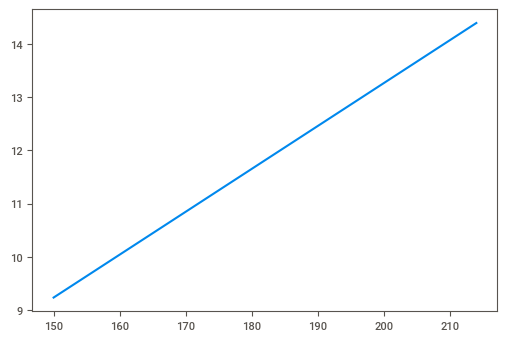

In [84]:
plt.plot(pred_linear)
plt.show()

In [85]:
#Exponential Model

Exp = smf.ols('np.log(CO2)~Year',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['Year'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['CO2'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

1819.210161560237

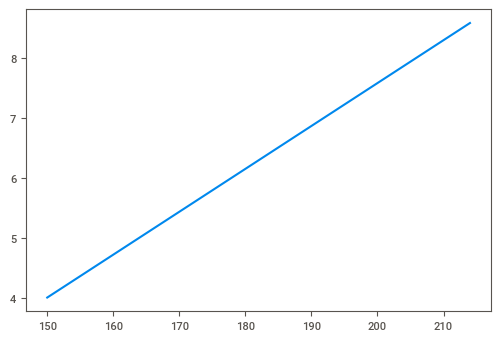

In [86]:
plt.plot(pred_Exp)
plt.show()

In [87]:
#Quadratic 

Quad = smf.ols('Year~CO2+CO2_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["CO2","CO2_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Year'])-np.array(pred_Quad))**2))
rmse_Quad

34.83088101604512

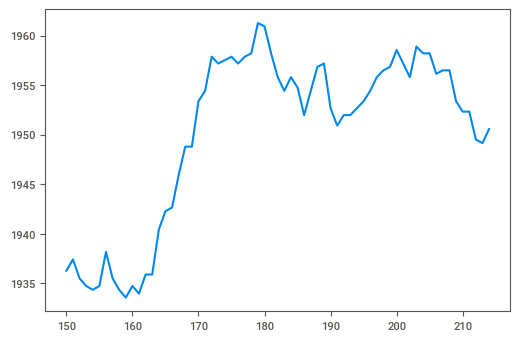

In [88]:
plt.plot(pred_Quad)
plt.show()

## Autoregression(AR)

In [89]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
from matplotlib import pyplot


In [90]:
data=air_quality['CO2']
data

0       0.00568
1       0.00561
2       0.00555
3       0.00548
4       0.00542
         ...   
210    15.60000
211    15.60000
212    14.80000
213    14.70000
214    15.10000
Name: CO2, Length: 215, dtype: float64

<AxesSubplot:>

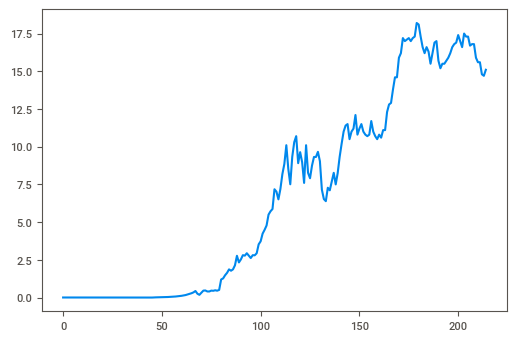

In [91]:
data.plot()

In [92]:
train=data[:len(data)-10]
test =data[len(data)-10:]

In [93]:
model= AutoReg(train,lags=9).fit()

In [94]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CO2   No. Observations:                  205
Model:                     AutoReg(9)   Log Likelihood                -158.433
Method:               Conditional MLE   S.D. of innovations              0.543
Date:                Thu, 23 Dec 2021   AIC                             -1.109
Time:                        15:50:40   BIC                             -0.925
Sample:                             9   HQIC                            -1.034
                                  205                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0796      0.056      1.418      0.156      -0.030       0.190
CO2.L1         0.9508      0.071     13.344      0.000       0.811       1.090
CO2.L2        -0.0860      0.098     -0.880      0.3

In [95]:
# # fit model
# model = AutoReg(data, lags=1)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.predict(len(data), len(data))
# print("value of yhat = ", yhat)

In [96]:
pred=model.predict(start=len(train),end=len(data)-1,dynamic=False)

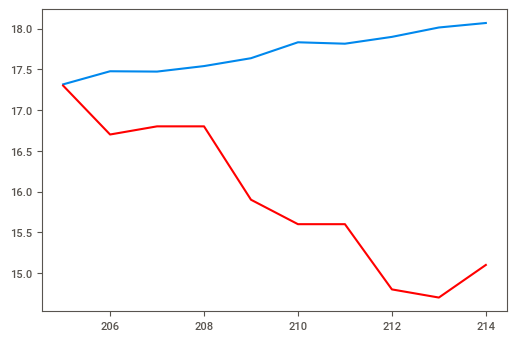

In [97]:
pyplot.plot(pred)
pyplot.plot(test,color='red')


## Calculate Error

In [98]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_AR=sqrt(mean_squared_error(test,pred))
mse=mean_squared_error(test,pred)
print('RMSE value :',rmse_AR)
print('MSE value :', mse)

RMSE value : 2.0944952025141714
MSE value : 4.386910153354879


## Making Future Predication

In [99]:
pred_future=model.predict(start=len(data)+1, end=len(data)+10,dynamic=False)
print("The Future prediction for the next 10 Year")
print(pred_future)
print('Number of prediction Made for Year : \t',len(pred_future))


The Future prediction for the next 10 Year
216    18.261609
217    18.347173
218    18.416774
219    18.508194
220    18.600443
221    18.678626
222    18.769834
223    18.852439
224    18.936019
225    19.021746
dtype: float64
Number of prediction Made for Year : 	 10


<AxesSubplot:>

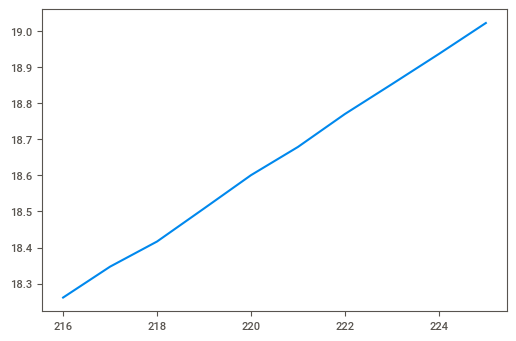

In [100]:
pred_future.plot()

## Moving Average(MA)

In [101]:
from statsmodels.tsa.arima.model import ARIMA

In [102]:
train=data[:len(data)-10]
test =data[len(data)-10:]

In [103]:
model= ARIMA(train,order=(0, 0, 1)).fit()

In [104]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  205
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -539.393
Date:                Thu, 23 Dec 2021   AIC                           1084.786
Time:                        15:50:44   BIC                           1094.755
Sample:                             0   HQIC                          1088.819
                                - 205                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3044      0.554     11.372      0.000       5.218       7.391
ma.L1          0.9501      0.019     50.715      0.000       0.913       0.987
sigma2        11.1689      2.125      5.257      0.0

In [105]:
pred_ma=model.predict(start=len(train),end=len(data)-1,dynamic=False)

205    17.314969
206    17.475872
207    17.471734
208    17.539354
209    17.635908
210    17.831268
211    17.813838
212    17.897552
213    18.012695
214    18.067699
dtype: float64


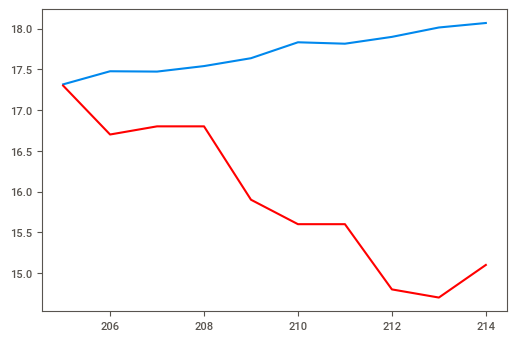

In [106]:
pyplot.plot(pred)
pyplot.plot(test,color='red')
print(pred)

## Calculate Error

In [107]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_MA=sqrt(mean_squared_error(test,pred_ma))
print(rmse_MA)

9.201725308544516


## Making Future prediction

In [108]:
pred_future_ma=model.predict(start=len(data)+1, end=len(data)+10,dynamic=False)
print("The Future prediction for the next 10 Year")
print(pred_future)
print('Number of prediction Made for Year : \t',len(pred_future_ma))

The Future prediction for the next 10 Year
216    18.261609
217    18.347173
218    18.416774
219    18.508194
220    18.600443
221    18.678626
222    18.769834
223    18.852439
224    18.936019
225    19.021746
dtype: float64
Number of prediction Made for Year : 	 10


<AxesSubplot:>

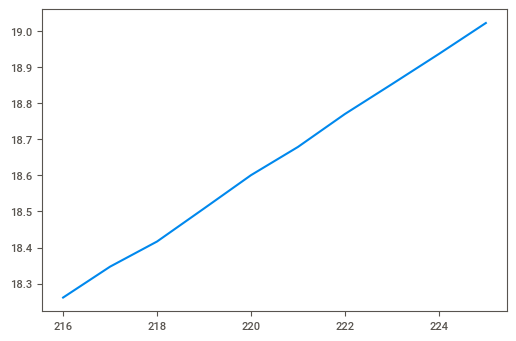

In [109]:
pred_future.plot()

In [110]:
# MA example
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print("value of yhat = ", yhat)

value of yhat =  215    10.652686
dtype: float64


## Autoregressive intergrated moving Average(ARIMA)¶

In [111]:
import datetime as dt
import matplotlib.pyplot as plt

In [112]:
data_str= air_quality.Year.astype(str)
data_str

0      1800
1      1801
2      1802
3      1803
4      1804
       ... 
210    2010
211    2011
212    2012
213    2013
214    2014
Name: Year, Length: 215, dtype: object

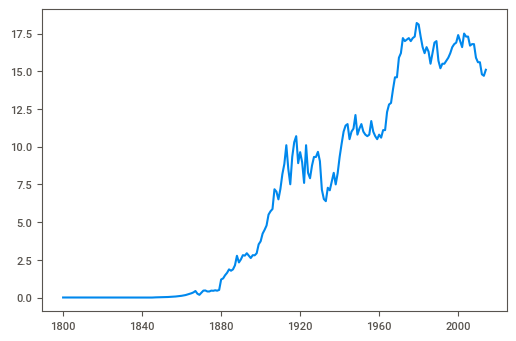

In [113]:
x = [dt.datetime.strptime(d,"%Y").date() for d in air_quality['Year'].astype(str)]
y = air_quality["CO2"]

plt.plot(x,y)
plt.show()

In [114]:
data

0       0.00568
1       0.00561
2       0.00555
3       0.00548
4       0.00542
         ...   
210    15.60000
211    15.60000
212    14.80000
213    14.70000
214    15.10000
Name: CO2, Length: 215, dtype: float64

                             ARIMA Model Results                              
Dep. Variable:                  D.CO2   No. Observations:                  214
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -174.615
Method:                       css-mle   S.D. of innovations              0.547
Date:                Thu, 23 Dec 2021   AIC                            355.231
Time:                        15:50:47   BIC                            365.328
Sample:                    01-01-1801   HQIC                           359.311
                         - 01-01-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0705      0.036      1.953      0.051      -0.000       0.141
ar.L1.D.CO2    -0.0363      0.068     -0.531      0.595      -0.170       0.097
                                    Roots       

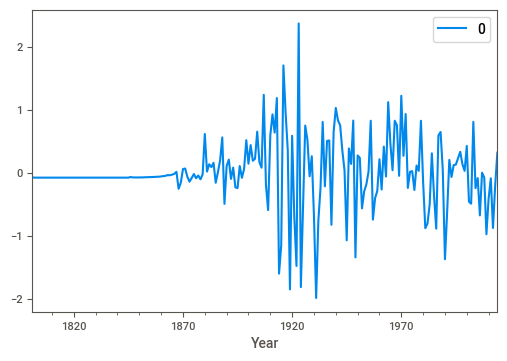

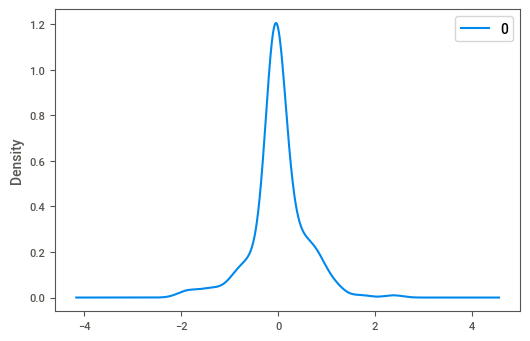

                0
count  214.000000
mean    -0.000012
std      0.548460
min     -1.985524
25%     -0.079574
50%     -0.068690
75%      0.189845
max      2.376923


In [115]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas import DataFrame
 
def parser(x):
	return dt.datetime.strptime(x, "%Y")
 
data = pd.read_excel("CO2 dataset.xlsx", header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

#arimaM = ARIMA(data, order=(5,1,0))
arimaM = ARIMA(data, order=(1,1,0))

arimaMfit = arimaM.fit(disp=1)
print(arimaMfit.summary())
# plot residual errors
errors = DataFrame(arimaMfit.resid)
errors.plot()
pyplot.show()
errors.plot(kind='kde')
pyplot.show()
print(errors.describe())

pred=9.279453, exp=10.200000
pred=10.198289, exp=11.000000
pred=11.021507, exp=11.400000
pred=11.456995, exp=11.500000
pred=11.578436, exp=10.500000
pred=10.648665, exp=11.000000
pred=11.041450, exp=11.200000
pred=11.266500, exp=12.100000
pred=12.119659, exp=10.800000
pred=11.010132, exp=11.200000
pred=11.240211, exp=11.500000
pred=11.552865, exp=11.000000
pred=11.133495, exp=10.800000
pred=10.898378, exp=10.700000
pred=10.786692, exp=10.800000
pred=10.866603, exp=11.700000
pred=11.691659, exp=11.000000
pred=11.157140, exp=10.700000
pred=10.806601, exp=10.500000
pred=10.593541, exp=10.800000
pred=10.843206, exp=10.600000
pred=10.693937, exp=11.100000
pred=11.121961, exp=11.100000
pred=11.175467, exp=12.300000
pred=12.251617, exp=12.800000
pred=12.836487, exp=12.900000
pred=12.975562, exp=13.800000
pred=13.803866, exp=14.600000
pred=14.627350, exp=14.600000
pred=14.693646, exp=15.900000
pred=15.889853, exp=16.200000
pred=16.278564, exp=17.200000
pred=17.232293, exp=17.000000
pred=17.121

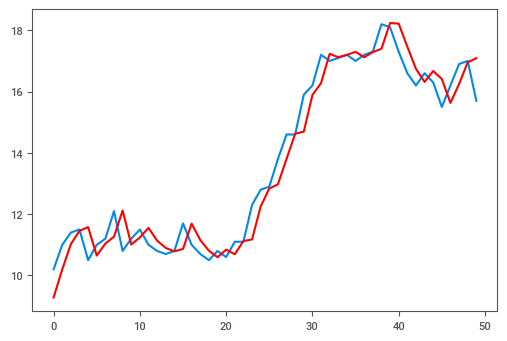

In [116]:
def parser(x):
	return dt.datetime.strptime(x, "%Y")
 
data = pd.read_excel("CO2 dataset.xlsx", header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = data.values
size = int(len(X) * 0.66)
limitCount = 50
train, test = X[0:size], X[size:size+limitCount]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit(disp=(0))
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('pred=%f, exp=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Mean Squared Error: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


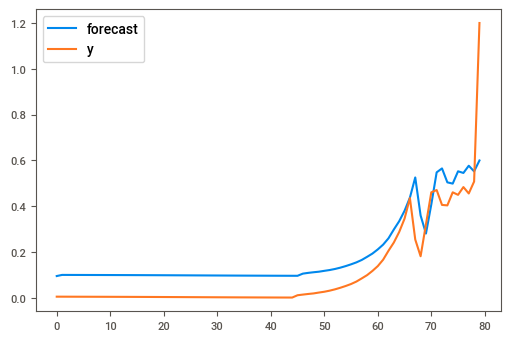

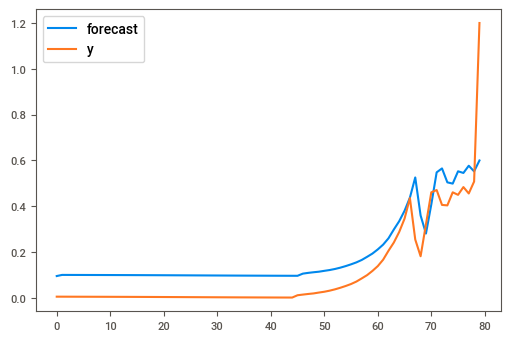

In [117]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [118]:
forecast

array([17.08938009, 17.17935048, 17.26928805, 17.35922745, 17.44916675,
       17.53910605, 17.62904535, 17.71898465, 17.80892396, 17.89886326])

In [119]:
rmse_ARIMA=sqrt(error)
print('RMSE value :',rmse_ARIMA)

RMSE value : 0.6228739217473859


## SEASONAL ARIMA

In [120]:
%matplotlib inline
import numpy as np
import matplotlib.pylab
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [121]:
df = pd.read_excel("CO2 dataset.xlsx")
df.head()

Year      CO2
0  1800  0.00568
1  1801  0.00561
2  1802  0.00555
3  1803  0.00548
4  1804  0.00542

In [122]:
dateparse = lambda x: pd.to_datetime(x, format='%Y', errors = 'coerce')
df = pd.read_excel("CO2 dataset.xlsx", parse_dates=['Year'], index_col='Year', date_parser=dateparse) 
df.head()


CO2
Year               
1800-01-01  0.00568
1801-01-01  0.00561
1802-01-01  0.00555
1803-01-01  0.00548
1804-01-01  0.00542

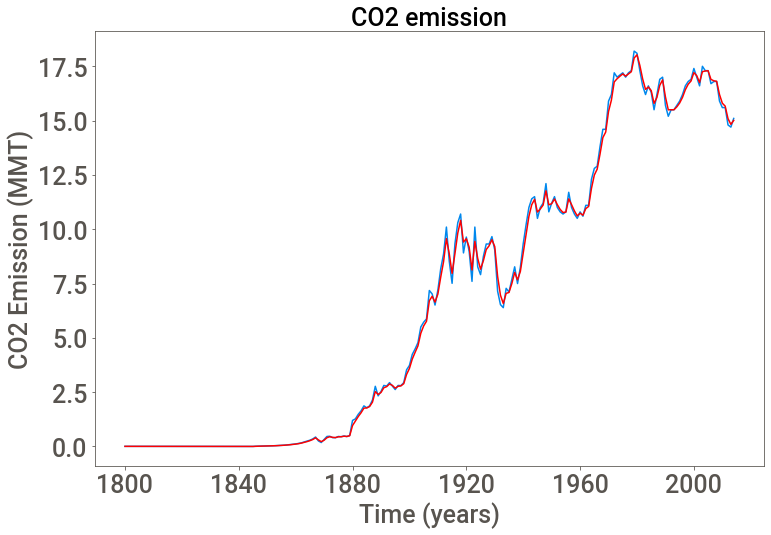

In [123]:
mte_exp_wighted_avg = df.ewm(span=2).mean()
plt.plot(df)
plt.plot(mte_exp_wighted_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission', fontsize = 25)
plt.show()

## Exponentail weighted moving average

###### Another technique is to take the ‘weighted moving average’ where more recent values are given a higher weight. The popular method to assign the waights is using the exponential weighted moving average. Where weights are assigned to all previous values with a decay factor.

In [124]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

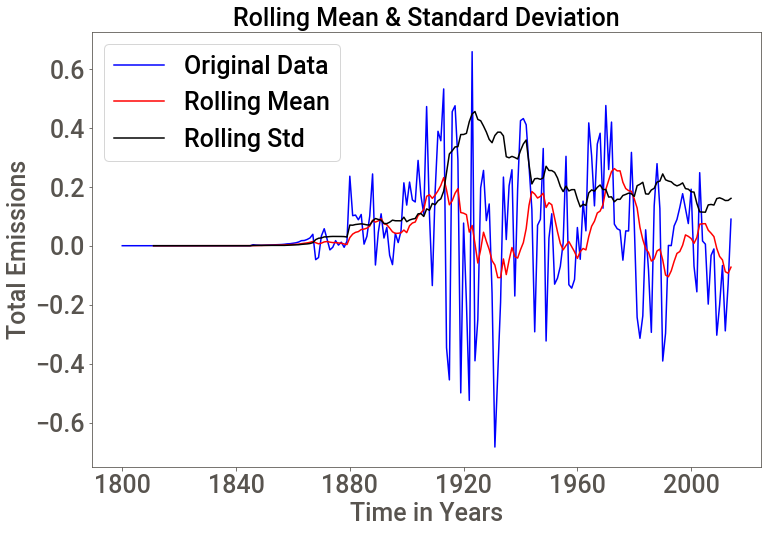

In [125]:
mte_ewma_diff = df - mte_exp_wighted_avg
TestStationaryPlot(mte_ewma_diff)

In [126]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [127]:
TestStationaryAdfuller(mte_ewma_diff)

Test Statistic                  -3.529944
p-value                          0.007251
#Lags Used                      15.000000
Number of Observations Used    199.000000
Critical Value (1%)             -3.463645
Critical Value (5%)             -2.876176
Critical Value (10%)            -2.574572
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


###### This time series has lesser variations in mean and standard deviation compared to the orginal ddataset. Also, the Test Statistic is smaller than the 5% and 10% critical value, which is better than the original case. There will be no missing values as all values from starting are given weights. So, it will work even with no previous values. In this case, we can say with 95% confidence level the series is a stationary series.

## Eliminating trend and seasonality: Differencing

###### One of the most common method of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the original observation at a particular instant with that at the previous instant. This mostly works well to improve stationarity. First order differencing can be done as follows

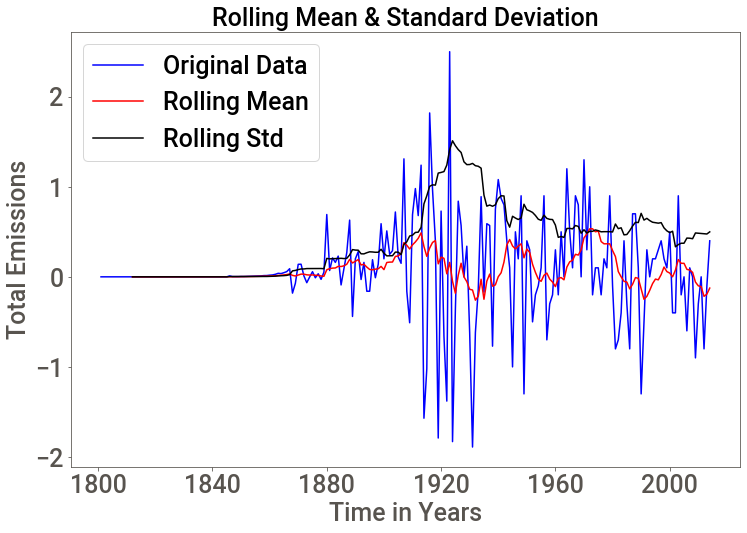

In [128]:
mte_first_difference = df - df.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [129]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                  -3.780005
p-value                          0.003119
#Lags Used                      15.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


The first difference improves the stationarity of the series significantly. Let us use also the seasonal difference to remove the seasonality of the data and see how that impacts stationarity of the data.

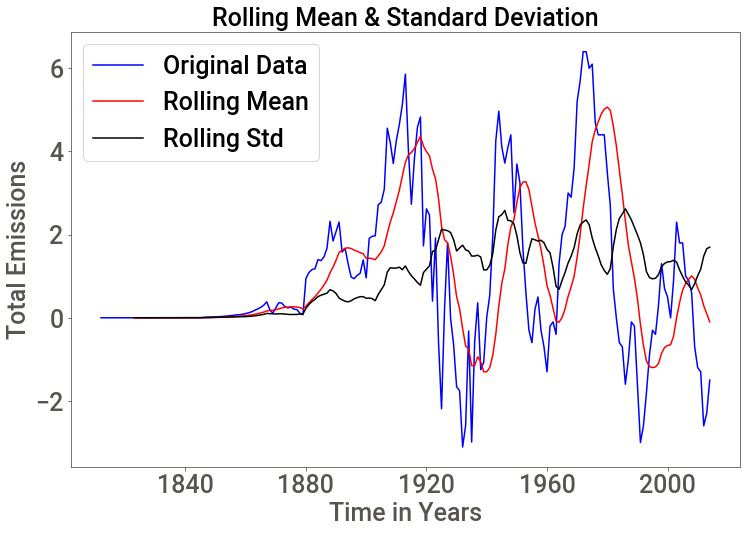

Test Statistic                  -1.847905
p-value                          0.356951
#Lags Used                      15.000000
Number of Observations Used    187.000000
Critical Value (1%)             -3.465812
Critical Value (5%)             -2.877123
Critical Value (10%)            -2.575077
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [130]:
mte_seasonal_difference = df - df.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

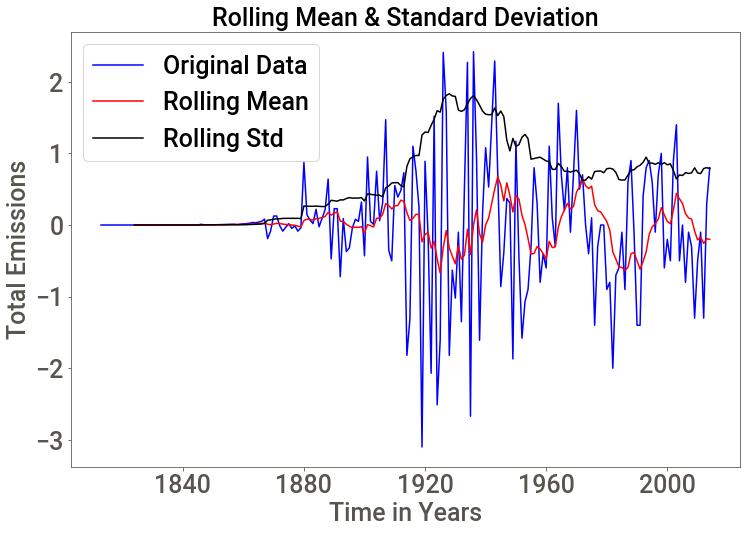

In [131]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [132]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -6.831718e+00
p-value                        1.886305e-09
#Lags Used                     1.400000e+01
Number of Observations Used    1.870000e+02
Critical Value (1%)           -3.465812e+00
Critical Value (5%)           -2.877123e+00
Critical Value (10%)          -2.575077e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


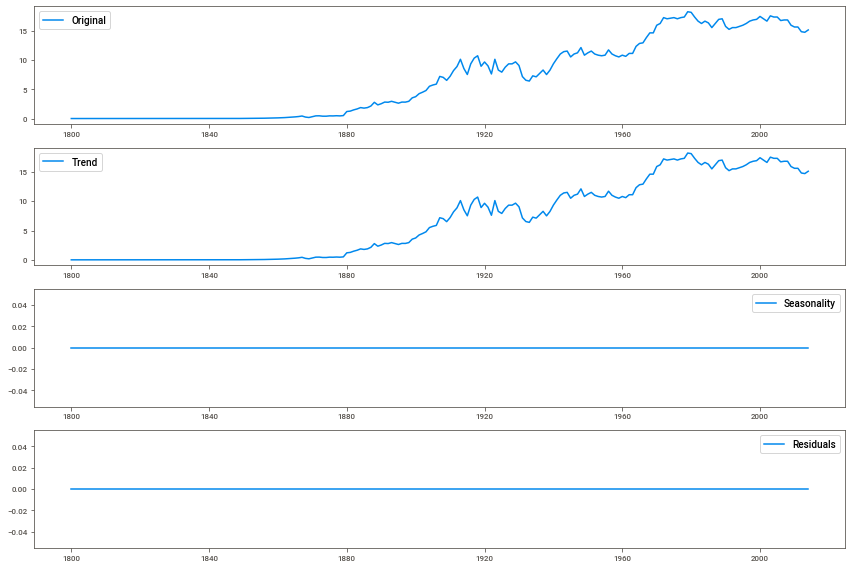

In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Find optimal parameters and build SARIMA model

When looking to fit time series dataset with seasonal ARIMA model, our first goal is to find the values of SARIMA(p,d,q)(P,D,Q)s that optimize our metric of interest. Before moving directly how to find the optimal values of the parameters let us see the two situations in stationarities: A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. The second case being a series with significant dependence among values and needs statistical models like ARIMA to forecast future oucomes.

Auto-Regressive Integrated Moving Average (ARIMA): The ARIMA forecasting for a stationary time series is a linear funcion similar to linear regression. The predictors mainly depend on the parameters (p,d,q) of the ARIMA model:

Number of Auto-Regressive (AR) terms (p): AR terms are just lags of dependent variable. For instance if p is 4, the predictors for x(t) will depend on x(t-1)….x(t-4). This term allows us to incorporate the effect of past values into our model. This would be similar to stating that the weather is likely to be warm tomorrow if it has been warm the past 4 days. Number of Moving Average(MA) terms (q): MA terms are lagged forecast errors in prediction function. This term allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past. For instance if q is 4, the predictors for x(t) will be e(t-1)….e(t-4) where e(i) is the difference between the moving average at ith instant and actual value. Number of Differences (d): These are the number of nonseasonal differences, i.e., if we took the first order difference. So either we can pass the first order difference variable and put d=0 or pass the original observed variable and put d=1. Both will generate same results. This term explains the number of past time points to subtract from the current value. This would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.

## Plot the ACF and PACF charts and find the optimal parameters

Autocorrelation Function (ACF): It is a measure of the correlation between the the time series (ts) with a lagged version of itself. For instance at lag 4, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-4’…’t2-4’ (t1-4 and t2 being end points of the range). Partial Autocorrelation Function (PACF): This measures the correlation between the ts with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 4, it will check the correlation but remove the effects already explained by lags 1 to 3. Therefore, the next step will be determing the tuning parameters (p and q) of the model by looking at the autocorrelation and partial autocorrelation graphs. The chart below provides a brief guide on how to read the autocorrelation and partial autocorrelation graphs inorder to select the parameters.

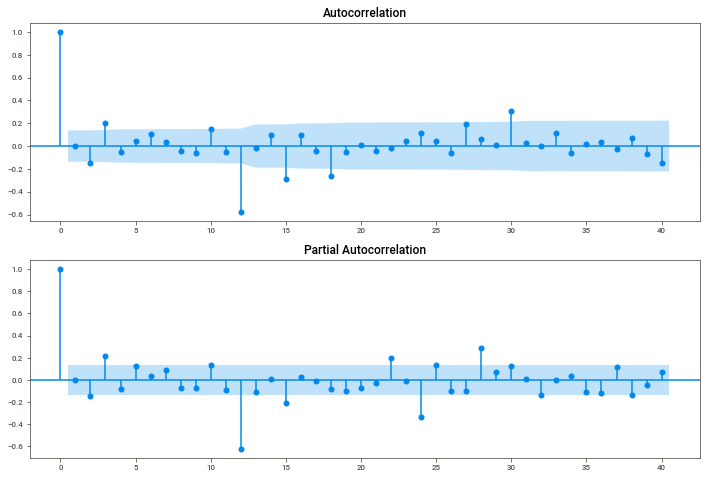

In [134]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [135]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [136]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [137]:
mod = sm.tsa.statespace.SARIMAX(train, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  141
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -105.590
Date:                            Thu, 23 Dec 2021   AIC                            219.180
Time:                                    15:51:47   BIC                            230.125
Sample:                                         0   HQIC                           223.622
                                            - 141                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2499      0.226      1.104      0.270      -0.194       0.694
ma.L1         -0.4569      0.215   

In [138]:
results

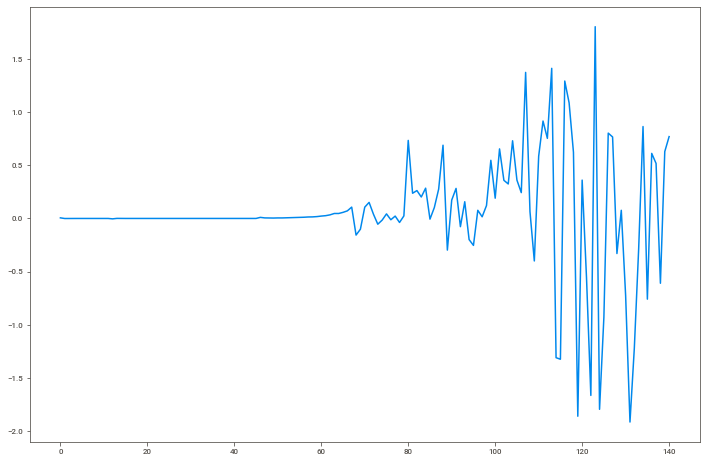

In [139]:
import matplotlib.pyplot as plt
plt.plot(results.resid)
plt.show()

In [140]:
dataframe = pd.DataFrame(results.resid, columns= ['values'])
dataframe

values
0    0.005680
1   -0.000543
2   -0.000109
3   -0.000068
4   -0.000051
..        ...
136  0.611815
137  0.517305
138 -0.609372
139  0.628794
140  0.769598

[141 rows x 1 columns]

In [141]:
print(dataframe.describe())

           values
count  141.000000
mean     0.045113
std      0.535599
min     -1.914383
25%     -0.000057
50%      0.000584
75%      0.151062
max      1.803232


<AxesSubplot:ylabel='Density'>

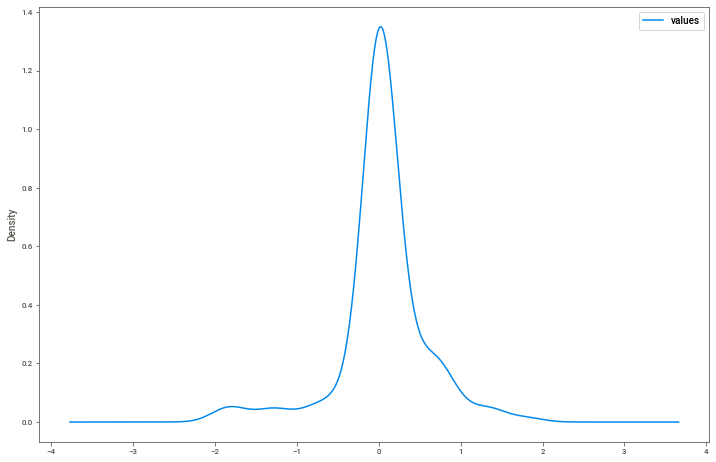

In [142]:
dataframe.plot(kind='kde')


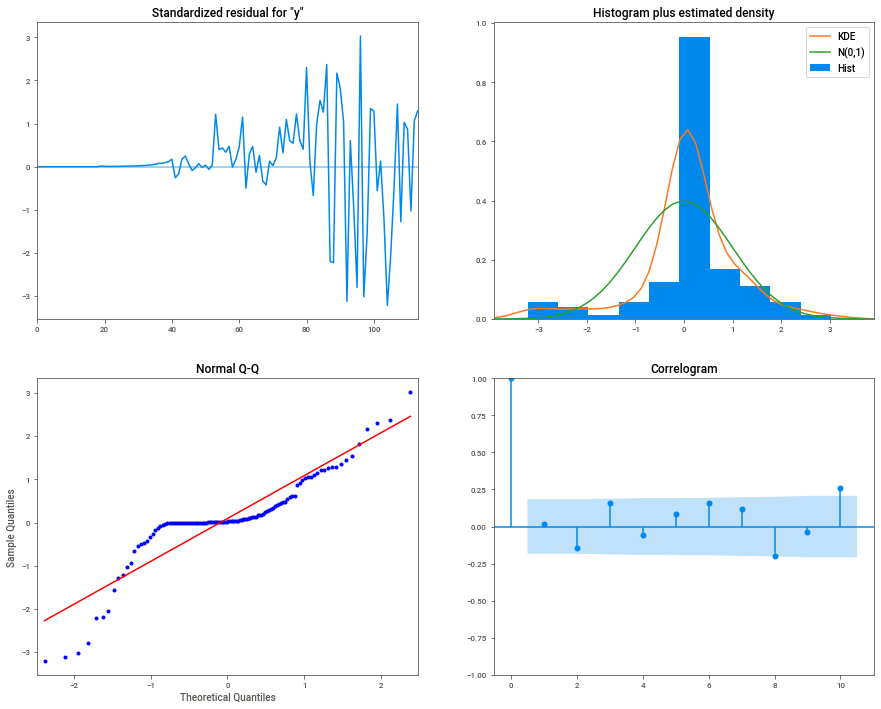

In [143]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

## Validating prediction

In [144]:
results

In [145]:
pred = results.get_prediction(start=len(data)+1, end=len(data)+10, dynamic=False)
pred_ci = pred.conf_int()
pred_ci

array([[ 3.16182548, 25.85445085],
       [ 2.82092951, 25.78930856],
       [ 2.75060445, 25.99021489],
       [ 3.18029959, 26.68766541],
       [ 3.04053132, 26.81254884],
       [ 3.13669824, 27.1704315 ],
       [ 2.84043461, 27.13305875],
       [ 2.87411192, 27.42289549],
       [ 3.28749505, 28.08979223],
       [ 3.35441965, 28.47274937]])

The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

We can plot the real and forecasted values of the CO2 emission time series to assess how well the model fits.

In [148]:
ax = df['2001':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

# plt.show()

In [149]:
from pandas import Series
from numpy.random import randn

In [150]:
mte_forecast = pred.predicted_mean
mte_truth = df['2005-01-01':]

ctn=mte_truth.to_numpy(dtype ='float32')

# Compute the mean square error
mse = ((mte_forecast - ctn)**2 ).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
#print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'.format(np.sqrt(sum((mte_forecast-ctn)**2)/len(mte_forecast))))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'.format(np.sqrt((mte_forecast - ctn)**2 ).mean()))

The Mean Squared Error (MSE) of the forecast is 1.89
The Root Mean Square Error (RMSE) of the forcast: 1.1230


In [151]:
rmse_SARIMA = 1.1230

## Super vector regression - SVR

In [152]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

# ! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
air= air_quality[['Year','CO2']]
print("Shape of close dataframe:", air.shape)

In [ ]:
air

In [ ]:
del air['Year']
scaler=MinMaxScaler(feature_range=(0,1))
air=scaler.fit_transform(np.array(air).reshape(-1,1))
print(air.shape)
air

In [ ]:
training_size=int(len(air)*0.85)
test_size=len(air)-training_size
train_data,test_data=air[0:training_size,:],air[training_size:len(air),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

In [ ]:
from sklearn.svm import SVR

svr_rbf =SVR(kernel='rbf', degree=3, gamma='scale', 
              coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, 
              shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
svr_rbf.fit(X_train, y_train)

In [ ]:
train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
rmse_svr = math.sqrt(mean_squared_error(original_ytest,test_predict))
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

### Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

### R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

### Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

In [ ]:
test_predict

In [ ]:
air_data=air_quality[['Year','CO2']]
air_data

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(air)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(air)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(air)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)



names = cycle(['Original co2 level','Train predicted co2 level','Test predicted co2 level'])

plotdf = pd.DataFrame({'Year': air_data['Year'],
                       'original_CO2': air_data['CO2'],
                      'train_predicted_CO2': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_CO2': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Year'], y=[plotdf['original_CO2'],plotdf['train_predicted_CO2'],
                                          plotdf['test_predicted_CO2']],
              labels={'value':'co2','year': 'Year'})
fig.update_layout(title_text='Comparision between original co2 Level vs predicted co2 level',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
plotdf = pd.DataFrame({'Year': air_data['Year'],
                       'original_CO2': air_data['CO2'],
                      'train_predicted_CO2': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_CO2': testPredictPlot.reshape(1,-1)[0].tolist()})
plotdf.tail(50)

## LSTM Network for Regression

The unit is called a long short-term memory block because the program is using a structure founded on short-term memory processes to create longer-term memory.... In general, LSTM is an accepted and common concept in pioneering recurrent neural networks.

We can write a simple function to convert our single column of data into a two-column dataset: the first column containing this month’s (t) passenger count and the second column containing next month’s (t+1) passenger count, to be predicted.

In [ ]:
train_size = int(len(air) * 0.67)
test_size = len(air) - train_size
train, test = air[0:train_size,:], air[train_size:len(air),:]
print(len(train), len(test))

In [ ]:
training_size=int(len(air)*0.67)
test_size=len(air)-training_size
train_data,test_data=air[0:training_size,:],air[training_size:len(air),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

In [ ]:

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data

In [ ]:
lstm_rmse = math.sqrt(mean_squared_error(original_ytrain,train_predict))
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

### Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

### R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse#

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
look_back=time_step
trainPredictPlot = np.empty_like(air)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(air)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(air)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original co2 level','Train predicted co2 level','Test predicted co2 level'])

plotdf = pd.DataFrame({'Year': air_data['Year'],
                       'original_CO2': air_data['CO2'],
                      'train_predicted_CO2': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_CO2': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Year'], y=[plotdf['original_CO2'],plotdf['train_predicted_CO2'],
                                          plotdf['test_predicted_CO2']],
              labels={'value':'co2','year': 'Year'})
fig.update_layout(title_text='Comparision between original co2 Level vs predicted co2 level',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next years: ", len(lst_output))

In [ ]:
x_input
temp_input
temp_input

In [ ]:
last_days=np.arange(1,time_step*1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(air[len(air)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

# Compare the results

In [ ]:
data = {"MODEL":pd.Series(["rmse_SARIMA","rmse_SVR", "rmse_linear","rmse_Exp","rmse_Quad","rmse_AR","rmse_MA","rmse_ARIMA","rmse_LSTM"]),"RMSE_Values":pd.Series([rmse_SARIMA,rmse_svr,rmse_linear,rmse_Exp,rmse_Quad,rmse_AR,rmse_MA,rmse_ARIMA,lstm_rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

# Deployment

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
import itertools

import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages


In [ ]:
import pandas as pd 
from datetime import datetime


def dateparse(dates):
    return datetime.strptime(dates, '%Y')


data = pd.read_excel("CO2 dataset.xlsx",
                           parse_dates=['Year'],
                           index_col='Year',
                           date_parser=dateparse)

##  Creating new dataframe with user input

In [ ]:
df = 12

In [ ]:
future_dates=[data.index[-1]+ DateOffset(years=x)for x in range(0,df)]

In [ ]:
future_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)

## Model building with arima

In [ ]:
final_arima = ARIMA(data['CO2'],order = (3,1,4))
final_arima = final_arima.fit()

In [ ]:
final_arima.fittedvalues.tail()

In [ ]:
future_data['CO2'] = final_arima.predict(start = 215, end = 225, dynamic= True)  
#future_df[['CO2', 'forecast']].plot(figsize=(12, 8))
#plt.title('Forecast for next 5 years')

In [ ]:

plt.figure(figsize=(12,5), dpi=100)
plt.plot(data, label='original')
#plt.plot(test, label='actual')
plt.plot(future_data['CO2'], label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
future_data.tail(df)